## MTU value comparision for tbed cluster

Values set betweeen 1000 and 1500.

In [9]:
import json
import yaml
import os
import matplotlib.pyplot as plt

In [10]:
def parse_json(filepath: str) -> dict:
    
    with open(filepath, "r") as stream:
        try:
            data = json.load(stream)
        except json.JSONDecodeError as jsonerr:
            print(jsonerr)
            exit("Could not load the test file.\n")
    return data

In [11]:
def data_extraction(location, test):
    p2ptcpvals = []
    p2stcpvals = []
    p2pudpvals = []
    p2sudpvals = []
    for folder in os.listdir(location):
        if folder == 'auto':
            continue
        current_location = location + '/' + folder
        for file in os.listdir(current_location):
            if file == test:
                filepath = current_location + '/' + file
                with open(filepath, "r") as stream:
                    try: 
                        data = yaml.safe_load(stream)
                        bandwidth = data['data']['pod2pod']['udp']['bandwidth']
                        p2pudpvals.append((int(folder), bandwidth))
                        bandwidth = data['data']['pod2pod']['tcp']['bandwidth']
                        p2ptcpvals.append((int(folder), bandwidth))
                        bandwidth = data['data']['pod2svc']['udp']['bandwidth']
                        p2sudpvals.append((int(folder), bandwidth))
                        bandwidth = data['data']['pod2svc']['tcp']['bandwidth']
                        p2stcpvals.append((int(folder),bandwidth))
                    except yaml.YAMLError as yerr:
                        print(yerr)
                        exit("Could not load the test file.\n")

    return p2ptcpvals, p2pudpvals, p2stcpvals, p2sudpvals


In [12]:
def network_plotting(p2ptcpvals, p2pudpvals, p2stcpvals, p2sudpvals, name):
    zip(*p2stcpvals)
    zip(*p2sudpvals)

    zip(*p2ptcpvals)
    zip(*p2pudpvals)

    fig, (scat1, scat2) = plt.subplots(2, 1)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    fig.suptitle(name)
    scat1.scatter(*zip(*p2ptcpvals), label='P2P TCP', color='red')
    scat1.scatter(*zip(*p2pudpvals), label='P2P UDP', color='green')

    scat2.scatter(*zip(*p2stcpvals), label='P2S TCP')
    scat2.scatter(*zip(*p2sudpvals), label='P2S UDP')

    scat1.legend()
    scat2.legend()
    # scat1.axis([1390, 1510, 600, 1000])
    # scat2.axis([1390, 1510, 600, 1000])


## Tbed Cluster

Measuring Bandwidth [Mbit/s] for different MTU value. Zoomed for values between 1400 and 1500

### Calico network 

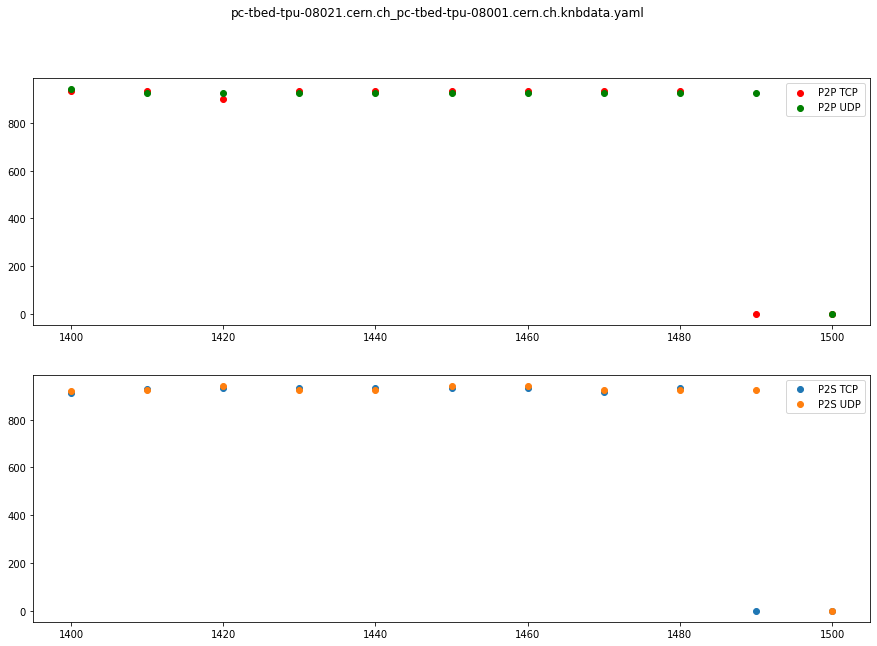

In [13]:
location = 'mtu-tests/tbed/results/caliconetwork'
test = "pc-tbed-tpu-08021.cern.ch_pc-tbed-tpu-08001.cern.ch.knbdata.yaml"
p2ptcpvals, p2pudpvals, p2stcpvals, p2sudpvals = data_extraction(location=location, test=test)
network_plotting(p2ptcpvals, p2pudpvals, p2stcpvals, p2sudpvals, test)

### Hostnetwork

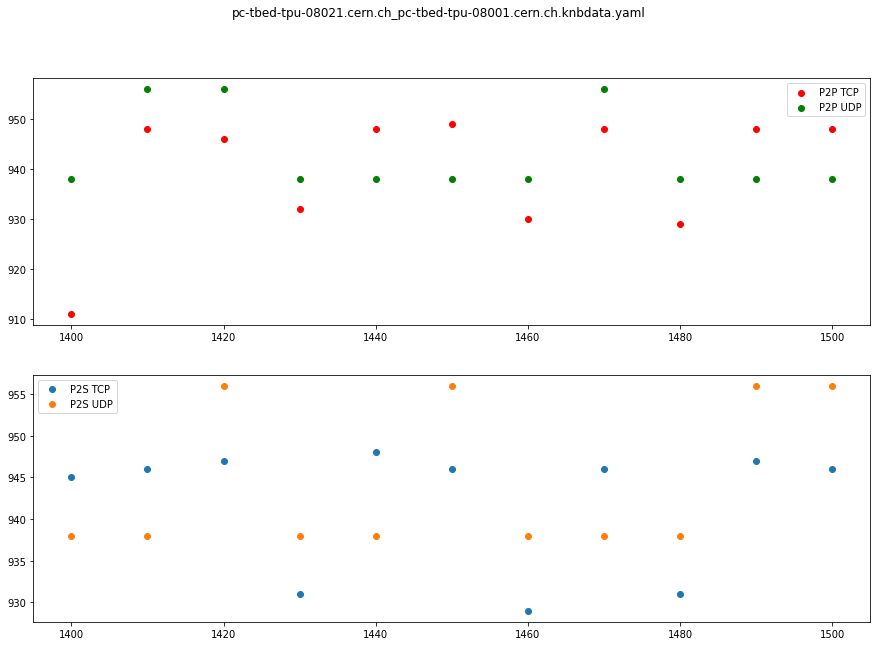

In [14]:
location = 'mtu-tests/tbed/results/hostnetwork'
test = "pc-tbed-tpu-08021.cern.ch_pc-tbed-tpu-08001.cern.ch.knbdata.yaml"
p2ptcpvals, p2pudpvals, p2stcpvals, p2sudpvals = data_extraction(location=location, test=test)
network_plotting(p2ptcpvals, p2pudpvals, p2stcpvals, p2sudpvals, test)

## Openstack Cluster

Used for reference for the tbed cluster

### Calico network

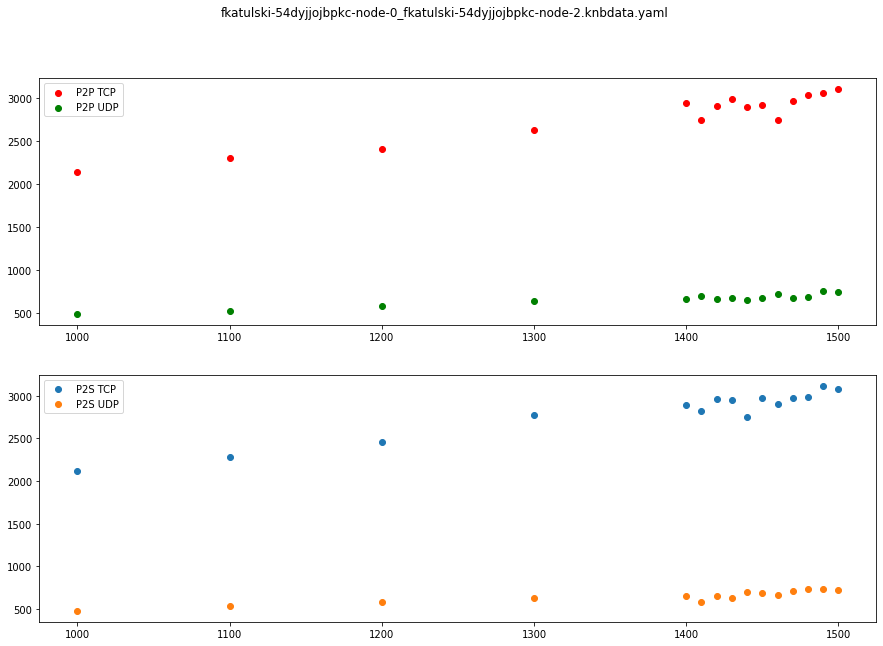

In [15]:
location = 'mtu-tests/openstack/results/caliconetwork'
test = 'fkatulski-54dyjjojbpkc-node-0_fkatulski-54dyjjojbpkc-node-2.knbdata.yaml'
p2ptcpvals, p2pudpvals, p2stcpvals, p2sudpvals = data_extraction(location=location, test=test)
network_plotting(p2ptcpvals, p2pudpvals, p2stcpvals, p2sudpvals, test)

### Hostnetwork

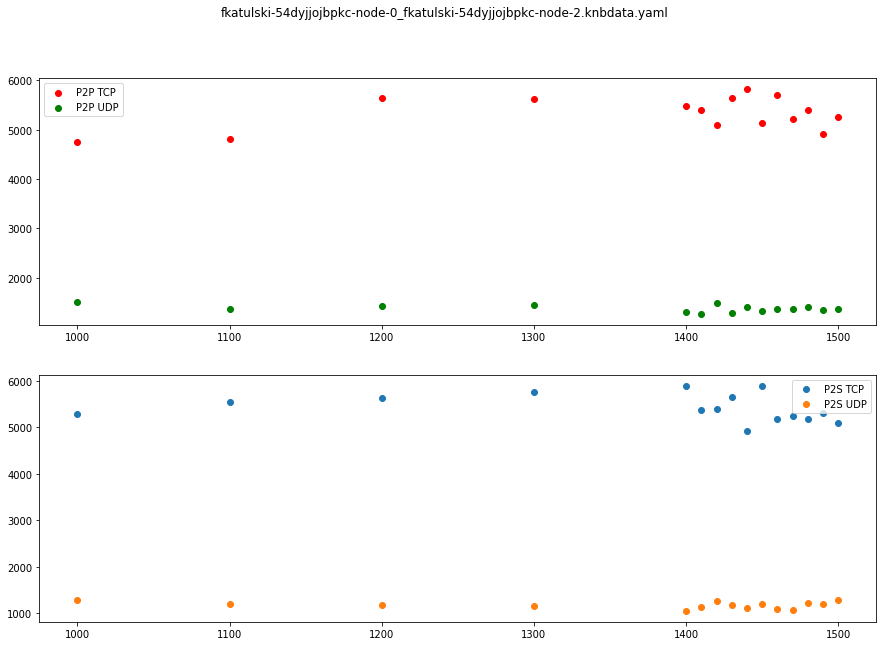

In [16]:
location = 'mtu-tests/openstack/results/hostnetwork'
test = 'fkatulski-54dyjjojbpkc-node-0_fkatulski-54dyjjojbpkc-node-2.knbdata.yaml'
p2ptcpvals, p2pudpvals, p2stcpvals, p2sudpvals = data_extraction(location=location, test=test)
network_plotting(p2ptcpvals, p2pudpvals, p2stcpvals, p2sudpvals, test)